<ipython-input-2-fc2c5ee47cf5>:12: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_data_2018 = pd.read_csv('CommentsApril2018.csv')


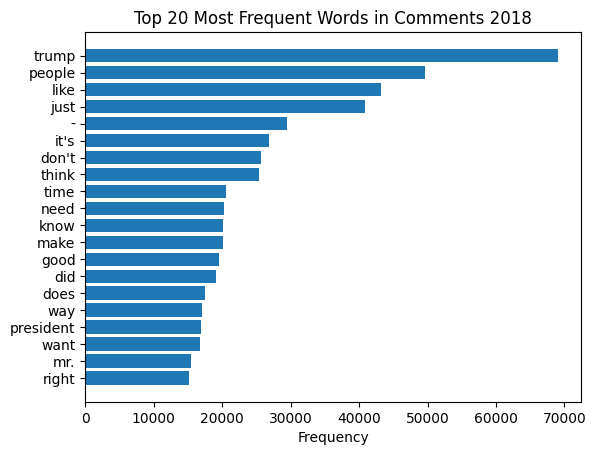

In [2]:
# this plot is using after-clearning dataset
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd
import re
import spacy


# Load dataset
comments_data_2018 = pd.read_csv('CommentsApril2018.csv')

# Combine all comments into one massive string
all_comments = ' '.join(comments_data_2018['commentBody'].dropna())

# Tokenize and remove stopwords
words = [word for word in all_comments.lower().split() if word not in ENGLISH_STOP_WORDS]

# Count words and plot
word_freq = Counter(words)
most_common_words = word_freq.most_common(20)

words, frequencies = zip(*most_common_words)
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Comments 2018')
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.show()


In [2]:
# Remove HTML tags and URLs
comments_data_2018['commentBody'] = comments_data_2018['commentBody'].apply(lambda x: re.sub(r'<.*?>', '', x))
comments_data_2018['commentBody'] = comments_data_2018['commentBody'].apply(lambda x: re.sub(r'http\S+', '', x))

# Convert to lowercase
comments_data_2018['commentBody'] = comments_data_2018['commentBody'].str.lower()

# Handle missing values (example: drop rows with missing 'commentBody')
comments_data_2018.dropna(subset=['commentBody'], inplace=True)


In [3]:
# Do the preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure that necessary nltk resources are downloaded
nltk.download('punkt')

# Preprocessing the comments
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'\W', ' ', text)
    # Remove numbers
    text = re.sub(r'\d', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to the commentBody column
preprocessed_comments = comments_data_2018['commentBody'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
# removed stopwords and do Lemmatization
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Remove stopwords
stop_words = set(stopwords.words('english'))
comments_data_2018['commentBody'] = comments_data_2018['commentBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
comments_data_2018['commentBody'] = comments_data_2018['commentBody'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Ensure nltk's stopwords are downloaded
nltk.download('stopwords')

# Convert the set of stop words to a list
stop_words_list = list(stopwords.words('english'))

# Initialize a TF-IDF Vectorizer with stop words as a list
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_list, ngram_range=(1,2))

# Get tfidf_matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_comments)

# Fit and transform the preprocessed comments
tfidf = tfidf_vectorizer.fit_transform(preprocessed_comments)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


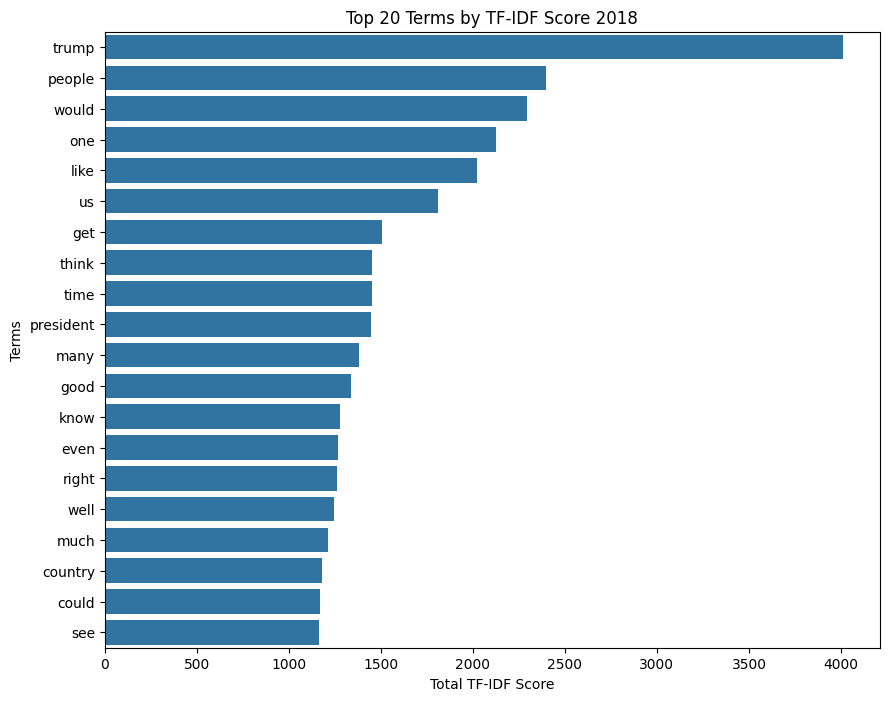

In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summing up the TF-IDF scores for each term across all documents
term_scores = tfidf_matrix.sum(axis=0)
terms = tfidf_vectorizer.get_feature_names_out()
term_scores_df = pd.DataFrame(term_scores, columns=terms, index=["score"]).T.sort_values(by="score", ascending=False)

# Step 2: Plotting the top 20 terms by TF-IDF score
top_terms = term_scores_df.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_terms['score'], y=top_terms.index)
plt.xlabel('Total TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 20 Terms by TF-IDF Score 2018')
plt.show()



In [7]:
# Use NMF for topic modeling
# Number of topics, let's try 5 topics
n_topics = 6

nmf_model = NMF(n_components=n_topics, random_state=42)
# tfidf as input
nmf_topic = nmf_model.fit_transform(tfidf)

In [9]:
nmf_topic

array([[3.95652359e-03, 5.61250612e-04, 0.00000000e+00, 4.14521836e-04,
        0.00000000e+00, 8.52706985e-05],
       [5.10527259e-03, 1.36116288e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.74712218e-03, 1.07514442e-03, 0.00000000e+00, 4.81289387e-04,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.13531229e-02, 0.00000000e+00, 1.09911525e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.09097594e-03, 1.93336505e-04, 9.82558459e-04, 0.00000000e+00,
        0.00000000e+00, 4.22127084e-04],
       [5.64366392e-04, 6.55736154e-05, 3.30917765e-04, 0.00000000e+00,
        9.48812248e-04, 1.57729868e-04]])

In [11]:
import numpy as np
labels = np.argmax(nmf_topic, axis=1)

In [12]:
labels

array([0, 0, 0, ..., 0, 0, 4])

In [13]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(tfidf, labels)
print(f"Silhouette Score: {silhouette}")


KeyboardInterrupt: 

In [14]:
from sklearn.utils import shuffle
# Assuming `tfidf_matrix` is your data matrix and you want to sample 10% of your data
sample_size = int(tfidf_matrix.shape[0] * 0.1)
tfidf_sample = shuffle(tfidf_matrix, random_state=42)[:sample_size]


Number of topics: 3, Silhouette Score: 0.0009816380424744454
Number of topics: 4, Silhouette Score: 0.0009594206543468877
Number of topics: 5, Silhouette Score: 0.0009613195880088805
Number of topics: 6, Silhouette Score: 0.0010326978317752088
Number of topics: 7, Silhouette Score: 0.0009939068034242491
Number of topics: 8, Silhouette Score: 0.0010660696486518855
Number of topics: 9, Silhouette Score: 0.001070133209024443


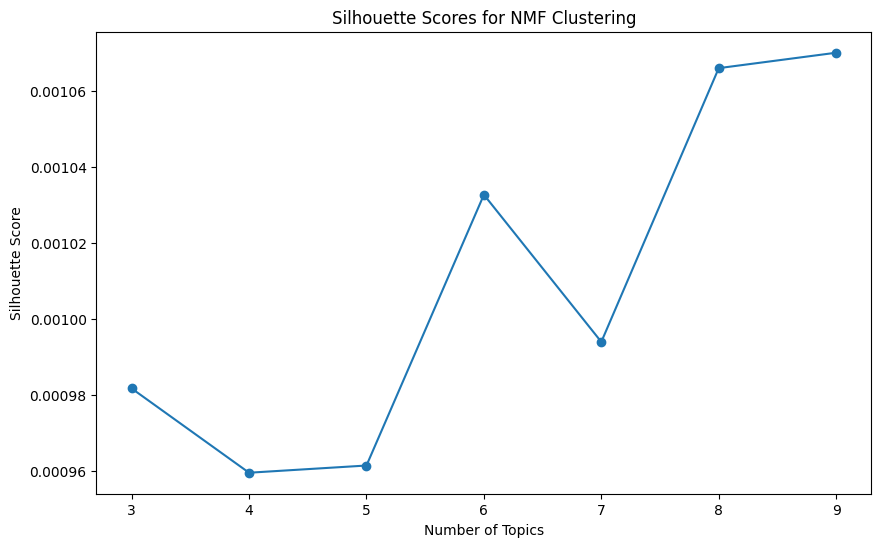

In [15]:
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Function to find the best number of topics for NMF using silhouette scores
def find_best_n_topics(tfidf_sample, start, end, step):
    silhouette_scores = []
    for n_topics in range(start, end, step):
        # Fit the NMF model
        nmf_model = NMF(n_components=n_topics, random_state=42)
        topic_distributions = nmf_model.fit_transform(tfidf_sample)

        # We only want to calculate silhouette scores if we have more than 1 cluster
        if n_topics == 1:
            silhouette_scores.append(-1)
            continue

        # Compute the silhouette scores
        silhouette_avg = silhouette_score(tfidf_sample, np.argmax(topic_distributions, axis=1))
        silhouette_scores.append(silhouette_avg)

        print(f"Number of topics: {n_topics}, Silhouette Score: {silhouette_avg}")

    return silhouette_scores

# Define the range for the number of topics
start = 3
end = 10
step = 1

# Find the silhouette scores for the defined range of topics
silhouette_scores = find_best_n_topics(tfidf_sample, start, end, step)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, end, step), silhouette_scores, marker='o')
plt.title('Silhouette Scores for NMF Clustering')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.xticks(range(start, end, step))
plt.show()


In [16]:
silhouette_scores = [0.0009816380424744454,
0.0009594206543468877
,0.0009613195880088805
,0.0010326978317752088]

In [17]:
start = 3
end = 7
step = 1

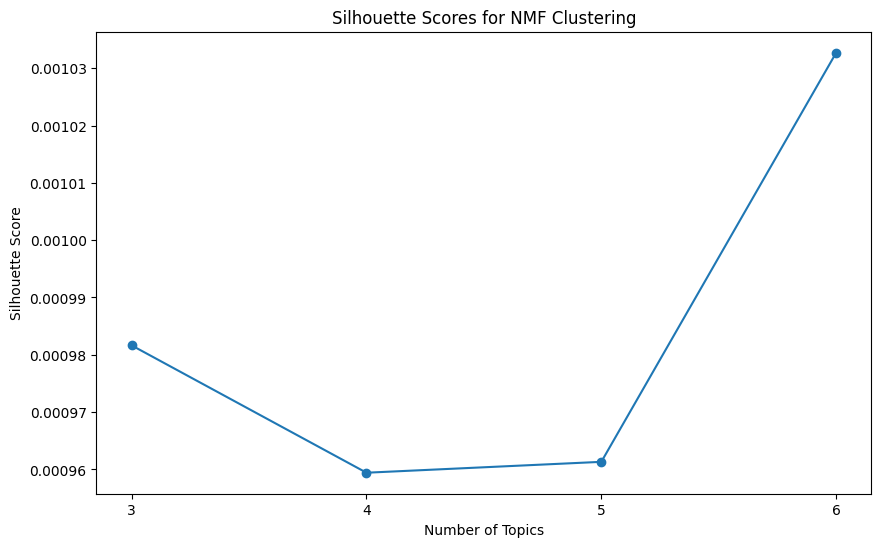

In [18]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, end, step), silhouette_scores, marker='o')
plt.title('Silhouette Scores for NMF Clustering')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.xticks(range(start, end, step))
plt.show()

Number of topics: 9, Silhouette Score: 0.001070133209024443
Number of topics: 10, Silhouette Score: 0.0010696481968591087
Number of topics: 11, Silhouette Score: 0.0010930154234247262
Number of topics: 12, Silhouette Score: 0.0010195104144083648
Number of topics: 13, Silhouette Score: 0.0010559382697295215
Number of topics: 14, Silhouette Score: 0.0010692079398906336
Number of topics: 15, Silhouette Score: 0.000933094065824235


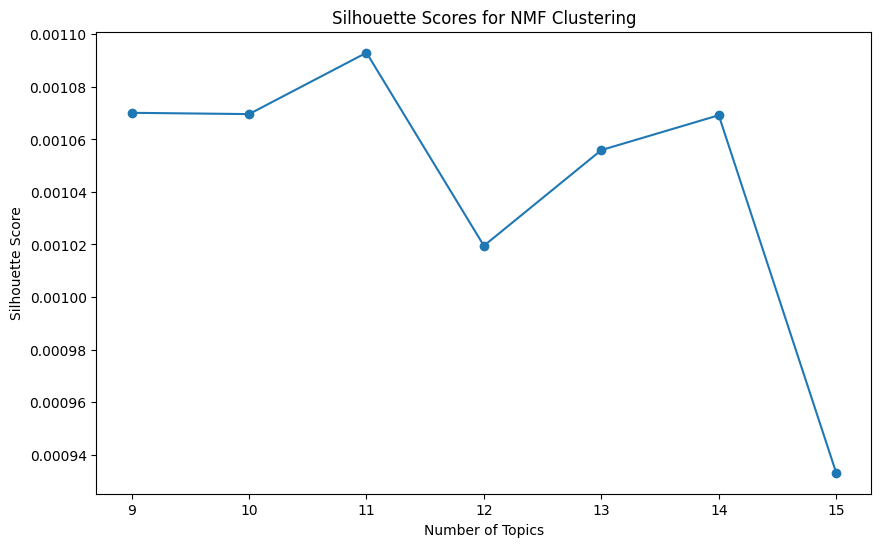

In [19]:
# Define the range for the number of topics
start = 9
end = 16
step = 1

# Find the silhouette scores for the defined range of topics
silhouette_scores = find_best_n_topics(tfidf_sample, start, end, step)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, end, step), silhouette_scores, marker='o')
plt.title('Silhouette Scores for NMF Clustering')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.xticks(range(start, end, step))
plt.show()

In [26]:
# Define the range for the number of topics
start = 35
end = 37
step = 1

# Find the silhouette scores for the defined range of topics
silhouette_scores = find_best_n_topics(tfidf_sample, start, end, step)


Number of topics: 35, Silhouette Score: -0.0009511821075302344
Number of topics: 36, Silhouette Score: -0.003094925012712653


In [25]:
silhouette_scores

[]

In [28]:
# Use NMF for topic modeling
# Number of topics, let's try 5 topics
n_topics = 6

nmf_model = NMF(n_components=n_topics, random_state=42)
# tfidf as input
nmf_topic = nmf_model.fit_transform(tfidf)

In [20]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Now, call the function with the correct method to get feature names
print_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 20)

Topic #0: people one would like think many time get good know women even much see make way years life could never
Topic #1: trump comey president mr mueller cohen donald donald trump mr trump investigation would putin clinton election like fbi office president trump news supporters
Topic #2: thank mr article thank mr god thank god comment yes great excellent story thank much piece beautiful read sharing nyt writing mr trump yes thank
Topic #3: us china war world trade israel korea syria russia north country military iran american weapons states america countries president nuclear
Topic #4: party republican republicans ryan vote tax democrats right gop democratic republican party paul voters congress paul ryan government president country house cuts
Topic #5: well said well said well done done said thank well written agree written trump said said sir mr well put sir thanks well well may well well stated bravo said thanks



# Sentiment analysis

In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [22]:
import numpy as np

# Get the topic distribution for documents
topic_distributions = nmf_model.transform(tfidf_matrix)

# Assign each document to the topic with the highest weight
document_topics = np.argmax(topic_distributions, axis=1)


In [23]:
# Compute sentiment scores for each document
sentiment_scores = [sia.polarity_scores(doc) for doc in preprocessed_comments]

# Extract compound scores which represent a normalized sentiment score
compound_scores = [score['compound'] for score in sentiment_scores]


In [24]:
# Calculate the average sentiment for each topic
average_sentiment_per_topic = []
for i in range(nmf_model.n_components):
    # Indices of documents for the given topic
    indices = [j for j, topic in enumerate(document_topics) if topic == i]

    # Average sentiment for those documents
    average_sentiment = np.mean([compound_scores[index] for index in indices])
    average_sentiment_per_topic.append(average_sentiment)

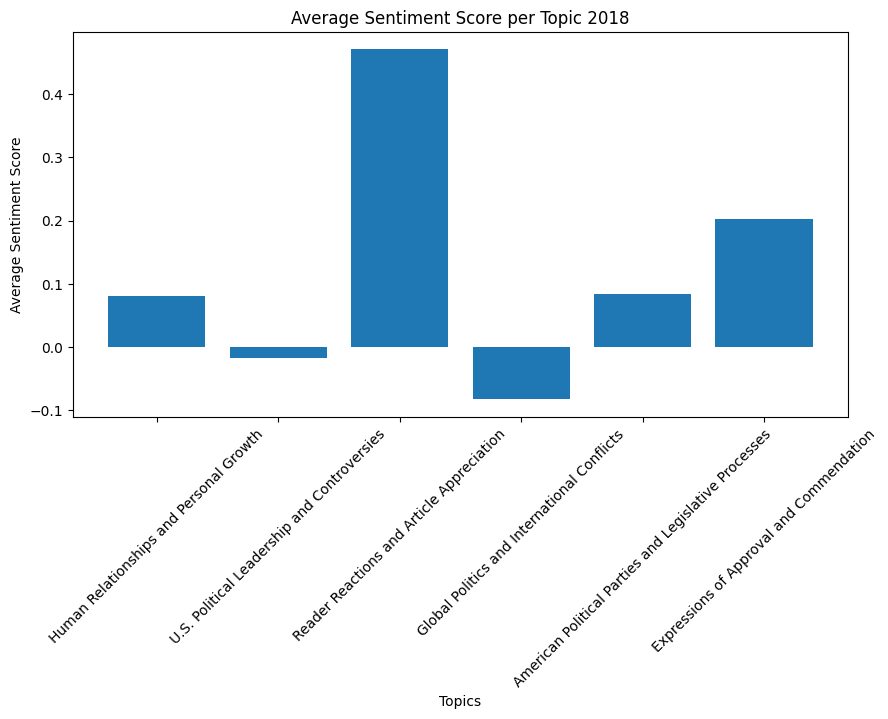

In [26]:
import matplotlib.pyplot as plt

# Assuming you have the list of topic names
topic_names = ["Human Relationships and Personal Growth",
"U.S. Political Leadership and Controversies",
"Reader Reactions and Article Appreciation",
"Global Politics and International Conflicts",
"American Political Parties and Legislative Processes",
"Expressions of Approval and Commendation" ]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(topic_names, average_sentiment_per_topic)
plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Topic 2018')
plt.xticks(rotation=45)  # Rotate the x labels if they are lengthy
plt.show()

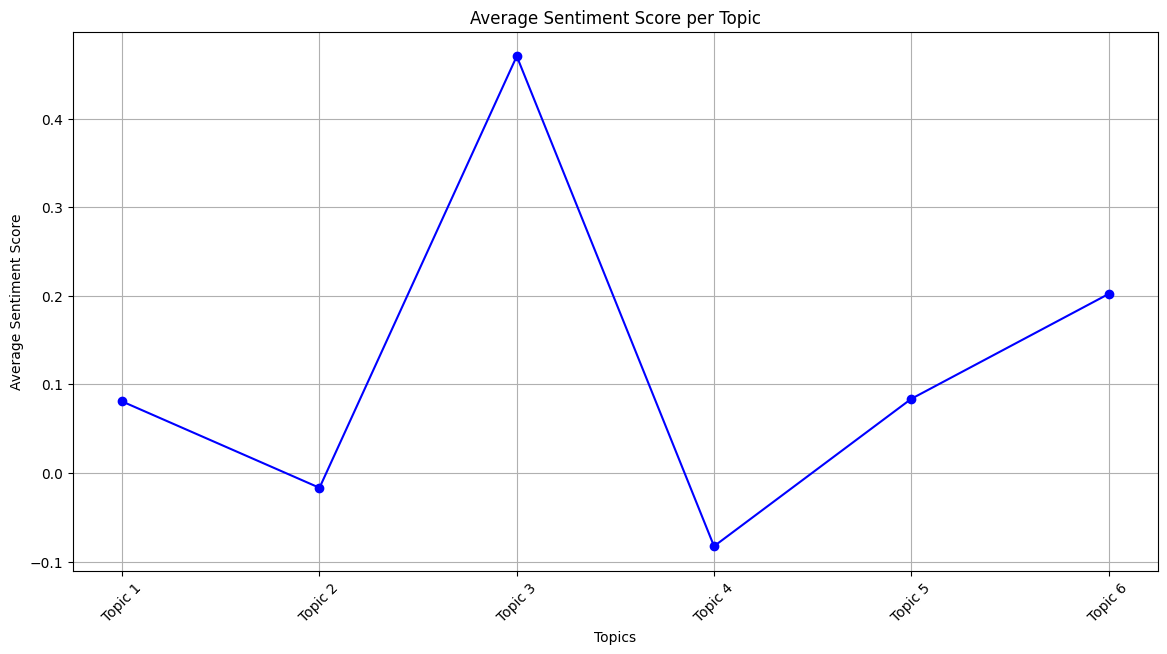

In [35]:
import matplotlib.pyplot as plt

# Assuming `average_sentiment_per_topic` is a list of average sentiment scores
# And 'n_topics' is the number of topics

# Create a list of topic numbers or names as your x-axis labels
topic_labels = [f"Topic {i+1}" for i in range(n_topics)]

# Plot
plt.figure(figsize=(14, 7))
plt.plot(topic_labels, average_sentiment_per_topic, marker='o', linestyle='-', color='b')
plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Topic')
plt.xticks(rotation=45)  # Rotate the x labels for better readability if necessary
plt.grid(True)
plt.show()


# 2017

<ipython-input-27-2c84e28d85ec>:10: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_data = pd.read_csv('CommentsApril2017.csv')


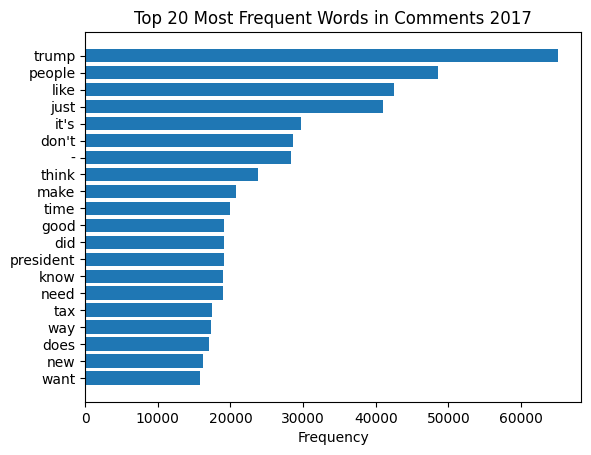

In [27]:
# this plot is using after-clearning dataset
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import re


# Load dataset
comments_data = pd.read_csv('CommentsApril2017.csv')

# Combine all comments into one massive string
all_comments = ' '.join(comments_data['commentBody'].dropna())

# Tokenize and remove stopwords
words = [word for word in all_comments.lower().split() if word not in ENGLISH_STOP_WORDS]

# Count words and plot
word_freq = Counter(words)
most_common_words = word_freq.most_common(20)

words, frequencies = zip(*most_common_words)
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Comments 2017')
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.show()


In [28]:
# Remove HTML tags and URLs
comments_data['commentBody'] = comments_data['commentBody'].apply(lambda x: re.sub(r'<.*?>', '', x))
comments_data['commentBody'] = comments_data['commentBody'].apply(lambda x: re.sub(r'http\S+', '', x))

# Convert to lowercase
comments_data['commentBody'] = comments_data['commentBody'].str.lower()

# Handle missing values (example: drop rows with missing 'commentBody')
comments_data.dropna(subset=['commentBody'], inplace=True)


In [29]:
# Do the preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure that necessary nltk resources are downloaded
nltk.download('punkt')

# Preprocessing the comments
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'\W', ' ', text)
    # Remove numbers
    text = re.sub(r'\d', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to the commentBody column
preprocessed_comments = comments_data['commentBody'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# removed stopwords and do Lemmatization
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Remove stopwords
stop_words = set(stopwords.words('english'))
comments_data['commentBody'] = comments_data['commentBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
comments_data['commentBody'] = comments_data['commentBody'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Ensure nltk's stopwords are downloaded
nltk.download('stopwords')

# Convert the set of stop words to a list
stop_words_list = list(stopwords.words('english'))

# Initialize a TF-IDF Vectorizer with stop words as a list
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_list, ngram_range=(1,2))

# Get tfidf_matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_comments)

# Fit and transform the preprocessed comments
tfidf = tfidf_vectorizer.fit_transform(preprocessed_comments)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


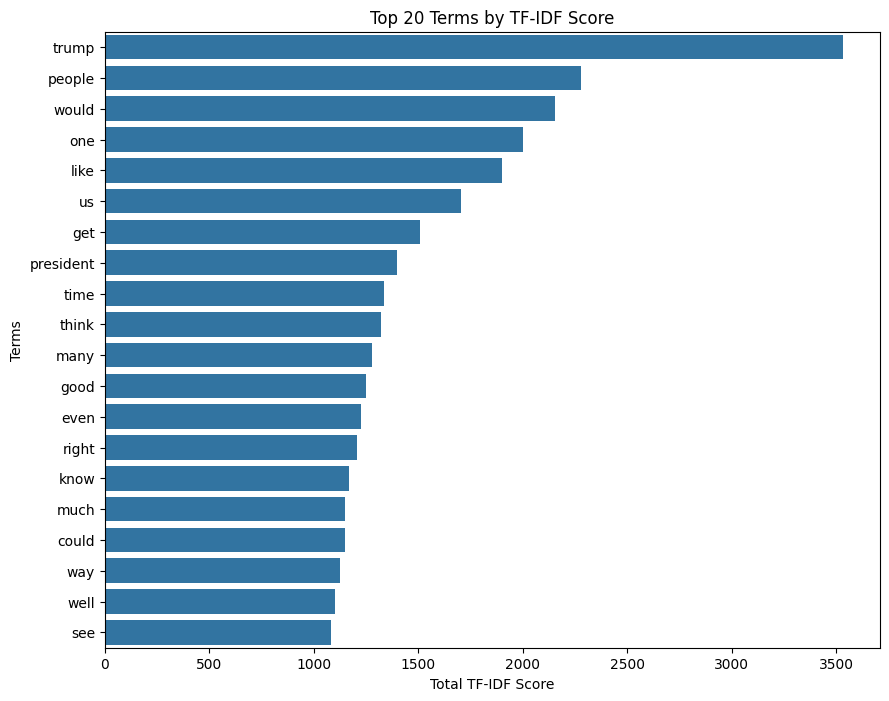

In [32]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summing up the TF-IDF scores for each term across all documents
term_scores = tfidf_matrix.sum(axis=0)
terms = tfidf_vectorizer.get_feature_names_out()
term_scores_df = pd.DataFrame(term_scores, columns=terms, index=["score"]).T.sort_values(by="score", ascending=False)

# Step 2: Plotting the top 20 terms by TF-IDF score
top_terms = term_scores_df.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_terms['score'], y=top_terms.index)
plt.xlabel('Total TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 20 Terms by TF-IDF Score')
plt.show()



In [33]:
from sklearn.utils import shuffle
# Assuming `tfidf_matrix` is your data matrix and you want to sample 10% of your data
sample_size = int(tfidf_matrix.shape[0] * 0.1)
tfidf_sample = shuffle(tfidf_matrix, random_state=42)[:sample_size]


Number of topics: 3, Silhouette Score: 0.0008128957157861889
Number of topics: 4, Silhouette Score: 0.0008653295594805311
Number of topics: 5, Silhouette Score: 0.0009830706165899615
Number of topics: 6, Silhouette Score: 0.0010244696485820473
Number of topics: 7, Silhouette Score: 0.001167506356808183


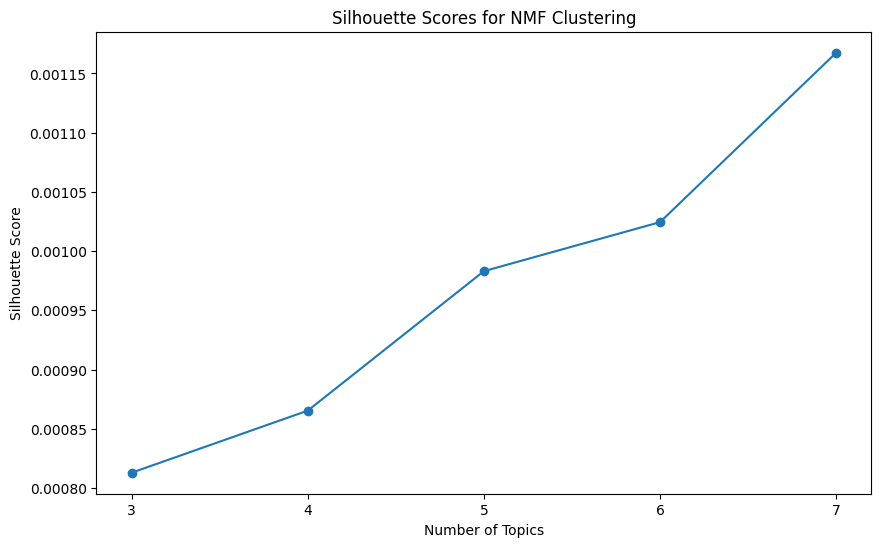

In [34]:
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Function to find the best number of topics for NMF using silhouette scores
def find_best_n_topics(tfidf_sample, start, end, step):
    silhouette_scores = []
    for n_topics in range(start, end, step):
        # Fit the NMF model
        nmf_model = NMF(n_components=n_topics, random_state=42)
        topic_distributions = nmf_model.fit_transform(tfidf_sample)

        # We only want to calculate silhouette scores if we have more than 1 cluster
        if n_topics == 1:
            silhouette_scores.append(-1)
            continue

        # Compute the silhouette scores
        silhouette_avg = silhouette_score(tfidf_sample, np.argmax(topic_distributions, axis=1))
        silhouette_scores.append(silhouette_avg)

        print(f"Number of topics: {n_topics}, Silhouette Score: {silhouette_avg}")

    return silhouette_scores

# Define the range for the number of topics
start = 3
end = 8
step = 1

# Find the silhouette scores for the defined range of topics
silhouette_scores = find_best_n_topics(tfidf_sample, start, end, step)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, end, step), silhouette_scores, marker='o')
plt.title('Silhouette Scores for NMF Clustering')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.xticks(range(start, end, step))
plt.show()


In [35]:
start = 3
end = 7
step = 1

In [36]:
# Find the silhouette scores for the defined range of topics
silhouette_scores =[0.0008128957157861889
,0.0008653295594805311
,0.0009830706165899615
,0.0010244696485820473]

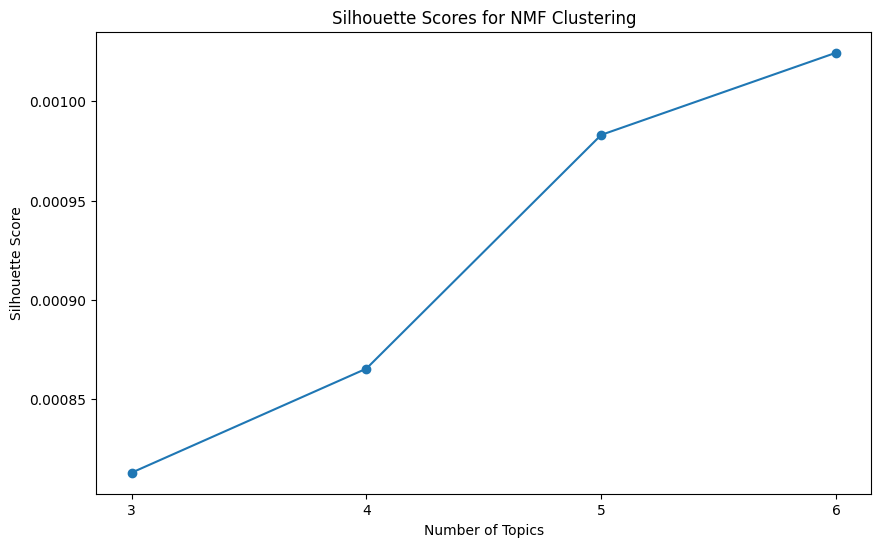

In [48]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, end, step), silhouette_scores, marker='o')
plt.title('Silhouette Scores for NMF Clustering')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.xticks(range(start, end, step))
plt.show()

Number of topics: 8, Silhouette Score: 0.001240069911035264
Number of topics: 9, Silhouette Score: 0.0013340627846597241
Number of topics: 10, Silhouette Score: 0.0014125525354540362
Number of topics: 11, Silhouette Score: 0.0014457941580978716
Number of topics: 12, Silhouette Score: 0.001523486116707191
Number of topics: 13, Silhouette Score: 0.0016361117685007136
Number of topics: 14, Silhouette Score: 0.0016651372867744205


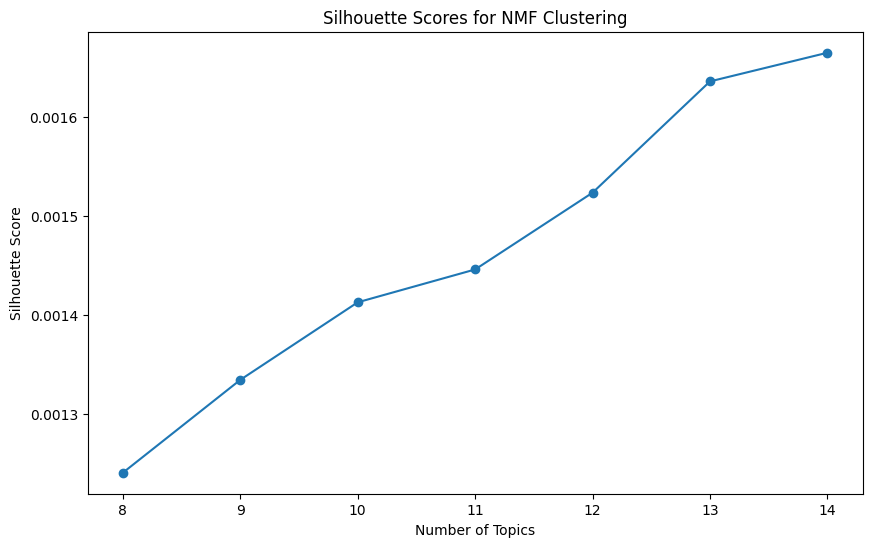

In [49]:
# Define the range for the number of topics
start = 8
end = 15
step = 1

# Find the silhouette scores for the defined range of topics
silhouette_scores = find_best_n_topics(tfidf_sample, start, end, step)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, end, step), silhouette_scores, marker='o')
plt.title('Silhouette Scores for NMF Clustering')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.xticks(range(start, end, step))
plt.show()

In [37]:
# Use NMF for topic modeling
# Number of topics, let's try 5 topics
n_topics = 6

nmf_model = NMF(n_components=n_topics, random_state=42)
# tfidf as input
nmf_topic = nmf_model.fit_transform(tfidf)

In [38]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Now, call the function with the correct method to get feature names
print_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 20)

Topic #0: people one like would many think get time good know even much well way see years make could work need
Topic #1: trump donald president donald trump mr putin mr trump administration voters supporters white russia white house house president trump election trump voters trump administration bannon trump supporters
Topic #2: tax taxes pay income cuts tax cuts plan returns money tax returns rich cut rate health reform care corporations corporate government wealthy
Topic #3: korea us war north north korea assad syria china russia weapons nuclear military chemical world attack chemical weapons south syrian obama president
Topic #4: republicans court democrats president party obama supreme republican supreme court vote senate gorsuch mcconnell right democratic garland filibuster election justice gop
Topic #5: united airlines flight airline fly passengers states united states passenger united airlines plane employees fly united never seat customers customer flying seats never fly



In [39]:
# Get the topic distribution for documents
topic_distributions = nmf_model.transform(tfidf_matrix)

# Assign each document to the topic with the highest weight
document_topics = np.argmax(topic_distributions, axis=1)

In [40]:
# Compute sentiment scores for each document
sentiment_scores = [sia.polarity_scores(doc) for doc in preprocessed_comments]

# Extract compound scores which represent a normalized sentiment score
compound_scores = [score['compound'] for score in sentiment_scores]


In [41]:
# Calculate the average sentiment for each topic
average_sentiment_per_topic = []
for i in range(nmf_model.n_components):
    # Indices of documents for the given topic
    indices = [j for j, topic in enumerate(document_topics) if topic == i]

    # Average sentiment for those documents
    average_sentiment = np.mean([compound_scores[index] for index in indices])
    average_sentiment_per_topic.append(average_sentiment)

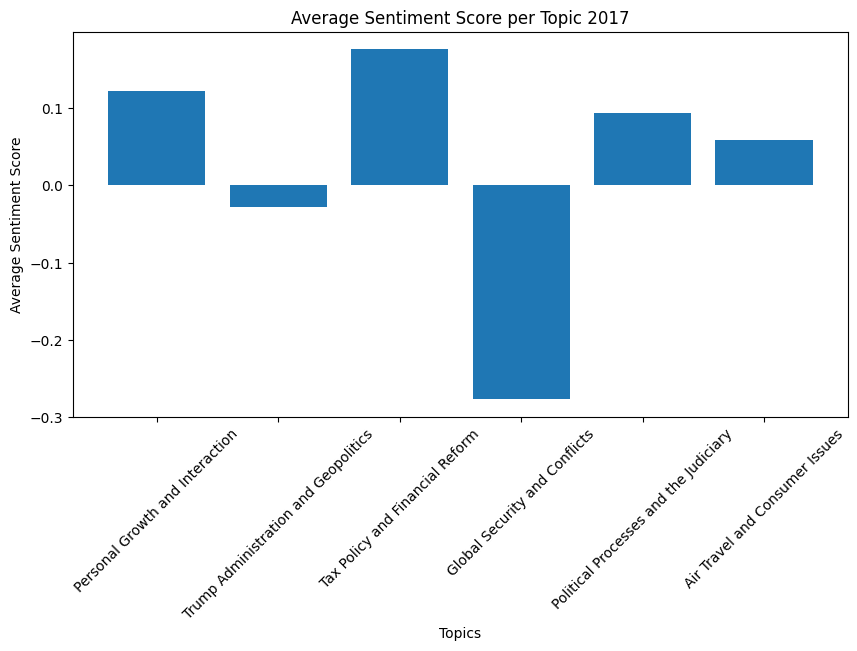

In [44]:
import matplotlib.pyplot as plt

# Assuming you have the list of topic names
topic_names = ["Personal Growth and Interaction",
"Trump Administration and Geopolitics",
"Tax Policy and Financial Reform",
"Global Security and Conflicts",
"Political Processes and the Judiciary",
"Air Travel and Consumer Issues"]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(topic_names, average_sentiment_per_topic)
plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Topic 2017')
plt.xticks(rotation=45)  # Rotate the x labels if they are lengthy
plt.show()

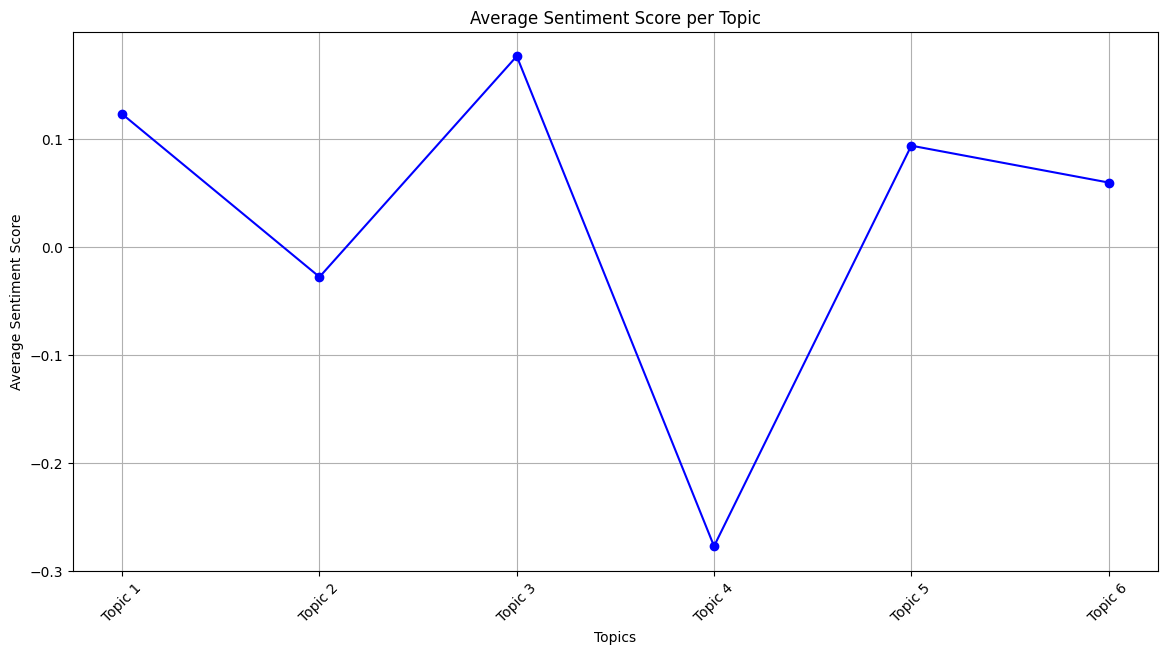

In [56]:
import matplotlib.pyplot as plt

# Assuming `average_sentiment_per_topic` is a list of average sentiment scores
# And 'n_topics' is the number of topics

# Create a list of topic numbers or names as your x-axis labels
topic_labels = [f"Topic {i+1}" for i in range(n_topics)]

# Plot
plt.figure(figsize=(14, 7))
plt.plot(topic_labels, average_sentiment_per_topic, marker='o', linestyle='-', color='b')
plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Topic')
plt.xticks(rotation=45)  # Rotate the x labels for better readability if necessary
plt.grid(True)
plt.show()


# combine dataset

In [3]:
# Load dataset
comments_data_2018 = pd.read_csv('CommentsApril2018.csv')

# Combine all comments into one massive string
all_comments_2018 = ' '.join(comments_data_2018['commentBody'].dropna())

<ipython-input-3-42ea2bf34485>:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_data_2018 = pd.read_csv('CommentsApril2018.csv')


In [6]:
# Load dataset
comments_data_2017 = pd.read_csv('CommentsApril2017.csv')

# Combine all comments into one massive string
all_comments_2017 = ' '.join(comments_data_2017['commentBody'].dropna())

<ipython-input-6-606d204a50ef>:2: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_data_2017 = pd.read_csv('CommentsApril2017.csv')


In [7]:
comments_data_2018['year'] = 2018

In [8]:
comments_data_2017['year'] = 2017

In [9]:
comments_data = pd.concat([comments_data_2018, comments_data_2017])

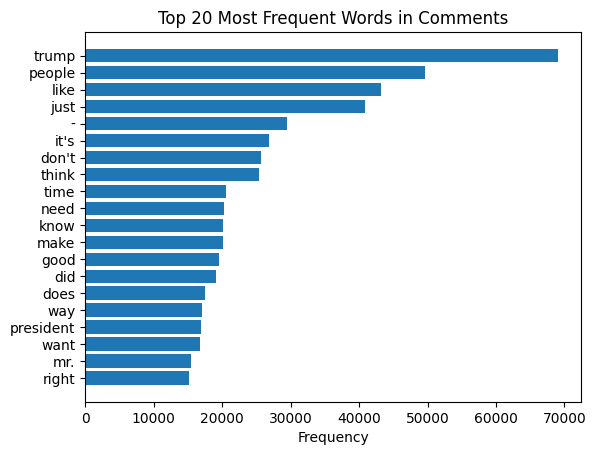

In [10]:
# Tokenize and remove stopwords
words = [word for word in all_comments.lower().split() if word not in ENGLISH_STOP_WORDS]

# Count words and plot
word_freq = Counter(words)
most_common_words = word_freq.most_common(20)

words, frequencies = zip(*most_common_words)
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Comments')
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.show()

In [11]:
# Remove HTML tags and URLs
comments_data['commentBody'] = comments_data['commentBody'].apply(lambda x: re.sub(r'<.*?>', '', x))
comments_data['commentBody'] = comments_data['commentBody'].apply(lambda x: re.sub(r'http\S+', '', x))

# Convert to lowercase
comments_data['commentBody'] = comments_data['commentBody'].str.lower()

# Handle missing values (example: drop rows with missing 'commentBody')
comments_data.dropna(subset=['commentBody'], inplace=True)

In [12]:
# Do the preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure that necessary nltk resources are downloaded
nltk.download('punkt')

# Preprocessing the comments
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'\W', ' ', text)
    # Remove numbers
    text = re.sub(r'\d', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to the commentBody column
preprocessed_comments = comments_data['commentBody'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# removed stopwords and do Lemmatization
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Remove stopwords
stop_words = set(stopwords.words('english'))
comments_data['commentBody'] = comments_data['commentBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
comments_data['commentBody'] = comments_data['commentBody'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Ensure nltk's stopwords are downloaded
nltk.download('stopwords')

# Convert the set of stop words to a list
stop_words_list = list(stopwords.words('english'))

# Initialize a TF-IDF Vectorizer with stop words as a list
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_list, ngram_range=(1,2))

# Get tfidf_matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_comments)

# Fit and transform the preprocessed comments
tfidf = tfidf_vectorizer.fit_transform(preprocessed_comments)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


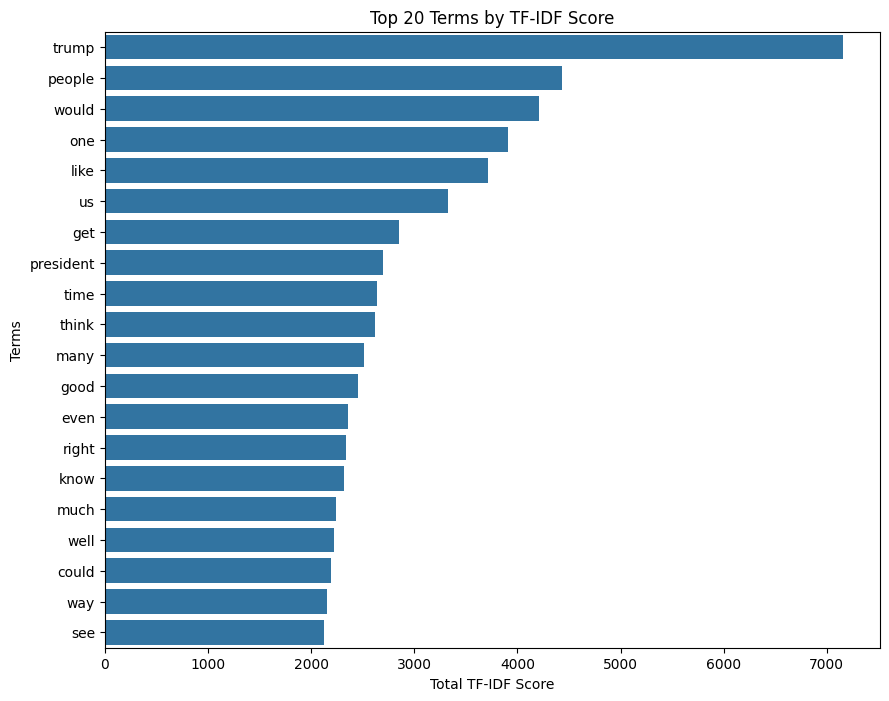

In [15]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summing up the TF-IDF scores for each term across all documents
term_scores = tfidf_matrix.sum(axis=0)
terms = tfidf_vectorizer.get_feature_names_out()
term_scores_df = pd.DataFrame(term_scores, columns=terms, index=["score"]).T.sort_values(by="score", ascending=False)

# Step 2: Plotting the top 20 terms by TF-IDF score
top_terms = term_scores_df.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_terms['score'], y=top_terms.index)
plt.xlabel('Total TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 20 Terms by TF-IDF Score')
plt.show()



In [58]:
from sklearn.utils import shuffle
# Assuming `tfidf_matrix` is your data matrix and you want to sample 10% of your data
sample_size = int(tfidf_matrix.shape[0] * 0.1)
tfidf_sample = shuffle(tfidf_matrix, random_state=42)[:sample_size]


Number of topics: 3, Silhouette Score: 0.0008287754000975145
Number of topics: 4, Silhouette Score: 0.000854841214793157
Number of topics: 5, Silhouette Score: 0.0008810593478491576
Number of topics: 6, Silhouette Score: 0.0009102978943619452
Number of topics: 7, Silhouette Score: 0.0009163163649225583


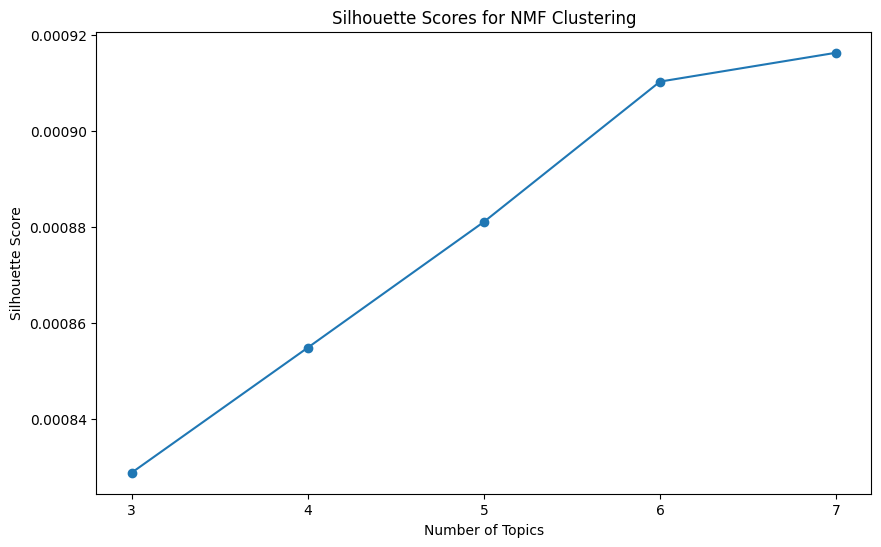

In [59]:
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Function to find the best number of topics for NMF using silhouette scores
def find_best_n_topics(tfidf_sample, start, end, step):
    silhouette_scores = []
    for n_topics in range(start, end, step):
        # Fit the NMF model
        nmf_model = NMF(n_components=n_topics, random_state=42)
        topic_distributions = nmf_model.fit_transform(tfidf_sample)

        # We only want to calculate silhouette scores if we have more than 1 cluster
        if n_topics == 1:
            silhouette_scores.append(-1)
            continue

        # Compute the silhouette scores
        silhouette_avg = silhouette_score(tfidf_sample, np.argmax(topic_distributions, axis=1))
        silhouette_scores.append(silhouette_avg)

        print(f"Number of topics: {n_topics}, Silhouette Score: {silhouette_avg}")

    return silhouette_scores

# Define the range for the number of topics
start = 3
end = 8
step = 1

# Find the silhouette scores for the defined range of topics
silhouette_scores = find_best_n_topics(tfidf_sample, start, end, step)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(start, end, step), silhouette_scores, marker='o')
plt.title('Silhouette Scores for NMF Clustering')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.xticks(range(start, end, step))
plt.show()


ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

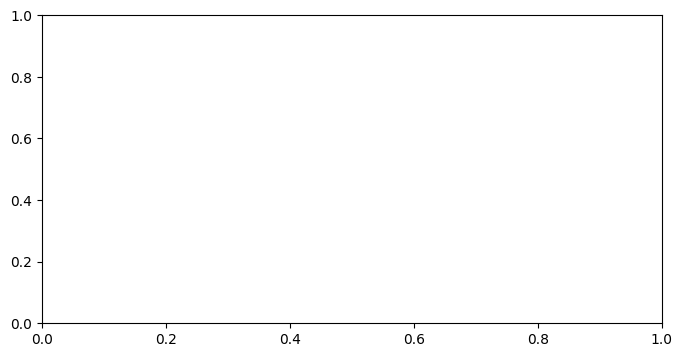

In [60]:
from sklearn.decomposition import NMF


reconstruction_errors = []
for k in range(3, 8):
    nmf = NMF(n_components=k, random_state=1, init='nndsvd').fit(tfidf_sample)
    reconstruction_errors.append(nmf.reconstruction_err_)



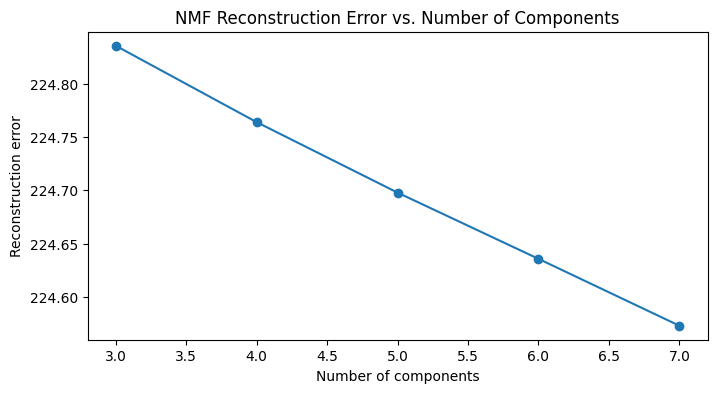

In [61]:
# Plot the reconstruction error as a function of the number of components
plt.figure(figsize=(8, 4))
plt.plot(range(3, 8), reconstruction_errors, '-o')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error')
plt.title('NMF Reconstruction Error vs. Number of Components')
plt.show()

In [62]:
# Use NMF for topic modeling
# Number of topics, let's try 7 topics
n_topics = 7

nmf_model = NMF(n_components=n_topics, random_state=42)
# tfidf as input
nmf_topic = nmf_model.fit_transform(tfidf)

In [63]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Now, call the function with the correct method to get feature names
print_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 20)

Topic #0: people one like would think many time get good know even much way see women could make years never life
Topic #1: trump donald mr donald trump comey mr trump putin mueller cohen supporters president administration like russia investigation trump supporters news russian president trump trump administration
Topic #2: tax taxes pay money cuts tax cuts income cut rich care health government returns plan class tax cut tax returns wealthy health care corporations
Topic #3: thank mr god thank god thank mr article comment great yes sharing excellent thank sharing thank much beautiful thank goodness thank thank piece story goodness nyt
Topic #4: us war korea china north syria north korea world assad russia weapons military nuclear chemical attack iran united south country trade
Topic #5: president party republican republicans right democrats vote obama house white court democratic clinton election white house gop hillary congress country voters
Topic #6: well said well said well done 

Topic #0: "Human Experience and Social Reflections"

Topic #1: "U.S. Politics and International Relations"

Topic #2: "Taxation and Economic Policy"

Topic #3: "Reader Engagement and Appreciation"

Topic #4: "Global Conflicts and Security"

Topic #5: "American Political Parties and Governance"

Topic #6: "Expressions of Agreement and Acknowledgment"


Topic #0: "Human Experience and Social Reflections"
Reasoning: The words such as "people," "life," "time," "good," "know," "women," and "years" suggest a focus on personal and societal perspectives. They reflect on general human experiences and social observations, hence the encompassing name about reflections on life and society.

Topic #1: "U.S. Politics and International Relations"
Reasoning: This cluster includes names like "Trump," "Comey," "Putin," "Mueller," and terms like "president," "administration," "Russia," and "investigation." These are clearly centered around figures in U.S. politics and their dealings with international counterparts, which is why the topic is named to reflect political and geopolitical discourse.

Topic #2: "Taxation and Economic Policy"
Reasoning: Terms such as "tax," "money," "income," "cuts," "rich," "government," "class," "corporations," and "health care" indicate discussions around fiscal policies, economic classes, and the implications of tax laws on society, leading to the choice of a name that represents economic discussions.

Topic #3: "Reader Engagement and Appreciation"
Reasoning: The presence of words like "thank," "mr," "article," "comment," "sharing," "beautiful," and "nyt" implies these are comments expressing gratitude or appreciation towards authors or publications, typically seen in response to articles or media content, thus reflecting reader engagement.

Topic #4: "Global Conflicts and Security"
Reasoning: The words "war," "Korea," "China," "Syria," "weapons," "military," "nuclear," and "attack" are indicative of discussions on international conflicts, military engagements, and security concerns, justifying a name that encapsulates global security issues.

Topic #5: "American Political Parties and Governance"
Reasoning: The inclusion of "president," "party," "republican," "democrats," "vote," "white house," "congress," "election," and political figures suggests a focus on internal political dynamics, electoral processes, and the functioning of government, hence a name that represents domestic political discourse.

Topic #6: "Expressions of Agreement and Acknowledgment"
Reasoning: Repeated use of phrases like "well said," "well done," "agree," "thanks," "bravo," and "said sir" implies a conversational nature of affirming or commending someone’s statement or opinion, leading to a title that suggests approval or positive acknowledgment.

In [17]:
# Use NMF for topic modeling
# Number of topics, let's try 6 topics
n_topics = 6

nmf_model = NMF(n_components=n_topics, random_state=42)
# tfidf as input
nmf_topic = nmf_model.fit_transform(tfidf)

In [20]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Now, call the function with the correct method to get feature names
print_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), 20)

Topic #0: people one would like many think time get good right know even way much years see could never make women
Topic #1: trump president mr donald comey donald trump mr trump obama election putin mueller clinton voters cohen supporters administration hillary house republican president trump
Topic #2: tax taxes pay money cuts tax cuts republicans income cut care government health rich republican class plan party returns health care tax cut
Topic #3: thank mr god thank god thank mr article comment great yes sharing excellent thank sharing thank much beautiful thank goodness thank thank story piece goodness read
Topic #4: us war korea china north syria world north korea assad president russia military weapons united nuclear chemical states obama attack country
Topic #5: well said well said well done done said thank agree trump said bravo well written well put mr written thanks bravo well said better may well well well said would said sir



Topic #0: "Societal and Personal Insights"

Topic #1: "Political Leadership and Campaigns"

Topic #2: "Taxation and Economic Policies"

Topic #3: "Appreciation and Media Interaction"

Topic #4: "Global Military Affairs and Diplomacy"

Topic #5: "Expressions of Acclaim and Agreement"



Topic #0: "Societal and Personal Insights"
The words suggest contemplation and discussion about individual and collective experiences, decisions, and the passage of time. They include reflections on life, societal dynamics, and personal beliefs.

Topic #1: "Political Leadership and Campaigns"
This topic contains specific names and terms related to U.S. politics, political figures, and the electoral process. It's focused on the personalities and events that shape political leadership and election campaigns.

Topic #2: "Taxation and Economic Policies"
Keywords such as "tax," "money," "cuts," "income," and "health care" are central to debates on fiscal strategy, tax legislation, and their impact on different socio-economic classes. It's clearly about financial policies and partisan stances on these issues.

Topic #3: "Appreciation and Media Interaction"
Phrases starting with "thank" and positive adjectives like "great," "excellent," and "beautiful," indicate expressions of gratitude, likely in response to media content or articles, representing engagement with and appreciation for information or storytelling.

Topic #4: "Global Military Affairs and Diplomacy"
The presence of terms related to countries, war, military, and weaponry points to discussions on international conflict, security issues, and the geopolitical landscape, which includes aspects of diplomacy and global strategy.

Topic #5: "Expressions of Acclaim and Agreement"
The repetitive use of approving phrases like "well said" and "well done," as well as respectful acknowledgments such as "thank you" and "bravo," are indicative of positive feedback and agreement, often found in dialogues or discussions affirming others' actions or opinions.

In [19]:
# Get the topic distribution for documents
topic_distributions = nmf_model.transform(tfidf_matrix)

# Assign each document to the topic with the highest weight
document_topics = np.argmax(topic_distributions, axis=1)

In [21]:
# Compute sentiment scores for each document
sentiment_scores = [sia.polarity_scores(doc) for doc in preprocessed_comments]

# Extract compound scores which represent a normalized sentiment score
compound_scores = [score['compound'] for score in sentiment_scores]

NameError: name 'sia' is not defined

In [68]:
# Assuming comments_data is your DataFrame and it contains a 'year' column
document_years = comments_data['year'].tolist()


In [69]:
# Assuming 'document_years' is a list or array that contains the year for each document
# and it corresponds by index to the documents in 'document_topics' and 'compound_scores'

# Initialize a dictionary to hold the average sentiment per topic for each year
average_sentiment_per_topic_by_year = {2017: [], 2018: []}

# Iterate over each year you're interested in
for year in [2017, 2018]:
    # Iterate over each topic
    for i in range(nmf_model.n_components):
        # Filter indices by both topic and year
        indices = [j for j, (topic, doc_year) in enumerate(zip(document_topics, document_years)) if topic == i and doc_year == year]

        # Check if there are any documents for that topic in the year
        if indices:
            # Calculate the average sentiment for those documents
            average_sentiment = np.mean([compound_scores[index] for index in indices])
        else:
            # If there are no documents for that topic in the year, set average sentiment to None or an appropriate value
            average_sentiment = None

        # Append the average sentiment for the topic in the year to the dictionary
        average_sentiment_per_topic_by_year[year].append(average_sentiment)

# Now 'average_sentiment_per_topic_by_year' contains the average sentiment per topic for each year


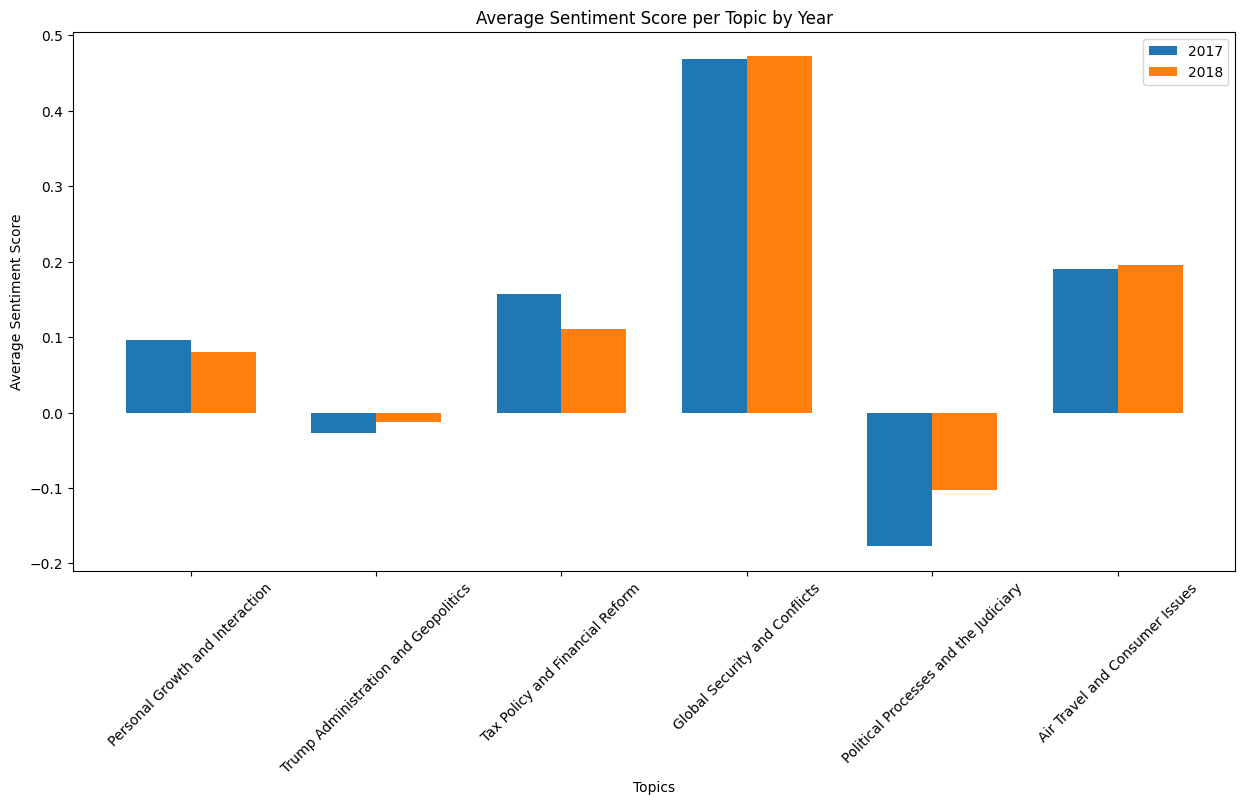

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the average sentiment per topic for each year as a dictionary
# average_sentiment_per_topic_by_year = {2017: [0.1, 0.2, ...], 2018: [0.3, 0.4, ...]}
# And 'topic_names' contains the names of the topics as provided

# Convert topic names to a range to serve as the x-axis positions
topic_range = np.arange(len(topic_names))

# Width of a bar
bar_width = 0.35

# Plot
plt.figure(figsize=(15, 7))

# Plotting data for 2017
plt.bar(topic_range - bar_width/2, average_sentiment_per_topic_by_year[2017], width=bar_width, label='2017')

# Plotting data for 2018
plt.bar(topic_range + bar_width/2, average_sentiment_per_topic_by_year[2018], width=bar_width, label='2018')

# Adding labels and title
plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Topic by Year')

# Adding xtick labels
plt.xticks(topic_range, topic_names, rotation=45)

# Adding a legend to denote the years
plt.legend()

#


In [23]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


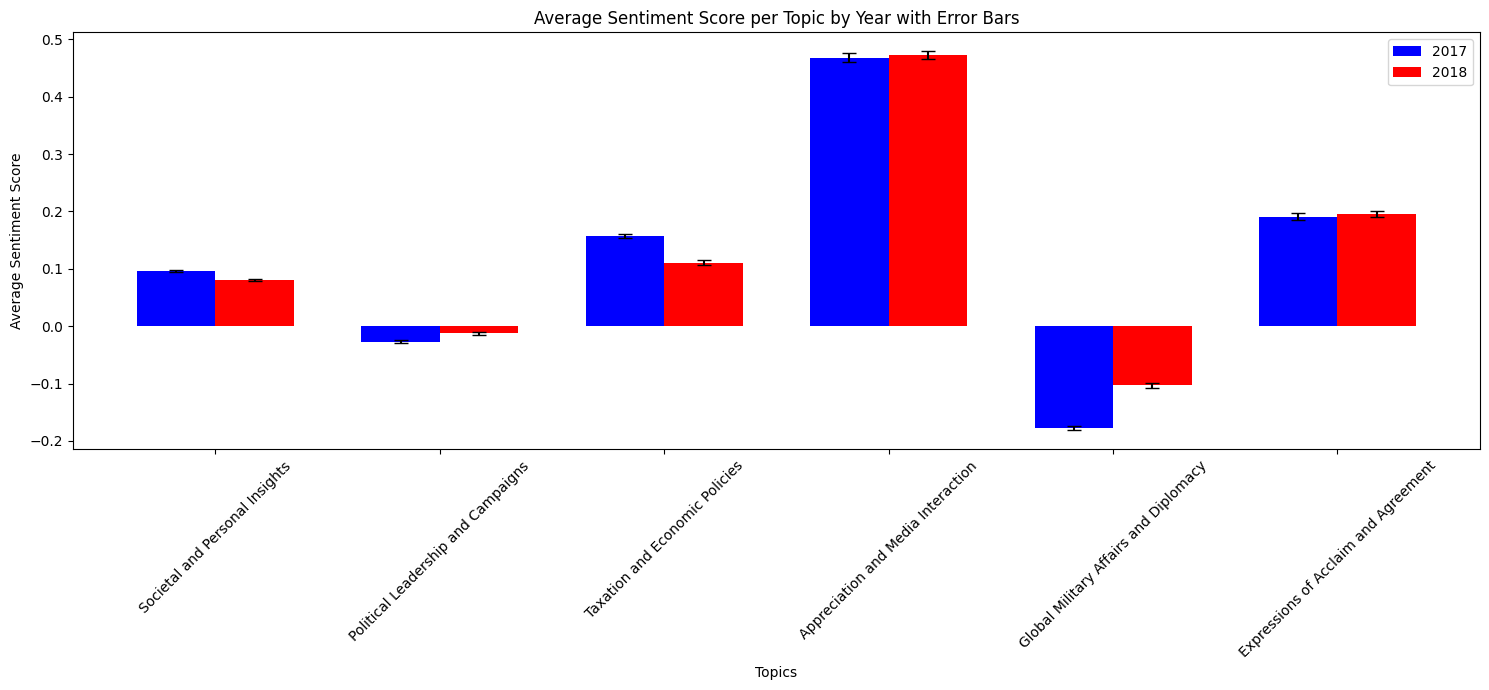

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind



# Assuming nmf_model, tfidf_matrix, sia, preprocessed_comments, comments_data are already defined

# Get the topic distribution for documents
topic_distributions = nmf_model.transform(tfidf_matrix)

# Assign each document to the topic with the highest weight
document_topics = np.argmax(topic_distributions, axis=1)

# Compute sentiment scores for each document
sentiment_scores = [sia.polarity_scores(doc) for doc in preprocessed_comments]

# Extract compound scores which represent a normalized sentiment score
compound_scores = [score['compound'] for score in sentiment_scores]

# Assuming comments_data is your DataFrame and it contains a 'year' column
document_years = comments_data['year'].tolist()

# Initialize a dictionary to hold the average sentiment per topic for each year
average_sentiment_per_topic_by_year = {2017: [], 2018: []}
standard_errors = {2017: [], 2018: []}  # Initialize a dictionary to hold standard errors

# Iterate over each year you're interested in
for year in [2017, 2018]:
    # Iterate over each topic
    for i in range(nmf_model.n_components):
        # Filter indices by both topic and year
        indices = [j for j, (topic, doc_year) in enumerate(zip(document_topics, document_years)) if topic == i and doc_year == year]

        # Calculate the average sentiment and standard error for those documents
        if indices:
            sentiments = [compound_scores[index] for index in indices]
            average_sentiment = np.mean(sentiments)
            # Calculate standard error of the mean
            standard_error = np.std(sentiments) / np.sqrt(len(sentiments))
        else:
            # If there are no documents for that topic in the year
            average_sentiment = None
            standard_error = None

        # Append the average sentiment and standard error for the topic in the year to the dictionaries
        average_sentiment_per_topic_by_year[year].append(average_sentiment)
        standard_errors[year].append(standard_error)

# Plotting
topic_names = ["Societal and Personal Insights",
"Political Leadership and Campaigns",
"Taxation and Economic Policies",
"Appreciation and Media Interaction",
"Global Military Affairs and Diplomacy",
"Expressions of Acclaim and Agreement"]  # Replace with the actual topic names
topic_range = np.arange(len(topic_names))  # the label locations
bar_width = 0.35  # the width of the bars

plt.figure(figsize=(15, 7))

# Adding error bars
for year, color in zip([2017, 2018], ['b', 'r']):
    plt.bar(topic_range - bar_width/2 if year == 2017 else topic_range + bar_width/2,
            average_sentiment_per_topic_by_year[year], width=bar_width, label=str(year),
            yerr=standard_errors[year], capsize=5, color=color)

plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Topic by Year with Error Bars')
plt.xticks(topic_range, topic_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
standard_errors

{2017: [0.0017337479462766318,
  0.00308901374495612,
  0.0037471773586737218,
  0.007759714377607059,
  0.0037620794385673515,
  0.005631081764033488],
 2018: [0.0016451555372954873,
  0.0026553760423078214,
  0.0040212292619709565,
  0.006895200748445249,
  0.0038818606426607146,
  0.005236812719312204]}

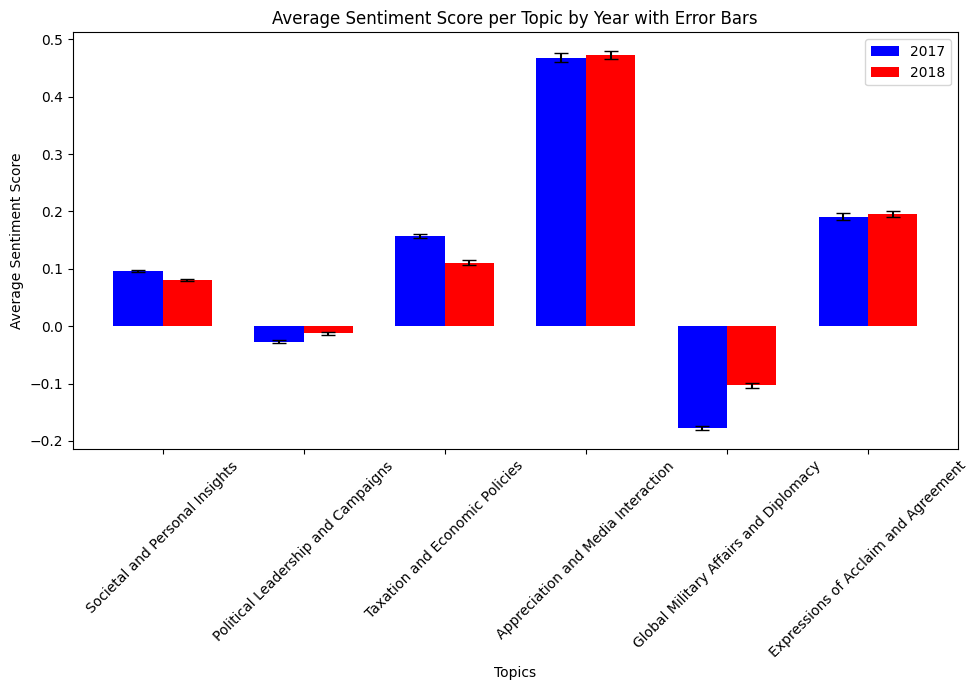

In [25]:
plt.figure(figsize=(10, 7))

# Adding error bars
for year, color in zip([2017, 2018], ['b', 'r']):
    plt.bar(topic_range - bar_width/2 if year == 2017 else topic_range + bar_width/2,
            average_sentiment_per_topic_by_year[year], width=bar_width, label=str(year),
            yerr=standard_errors[year], capsize=5, color=color)

plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Topic by Year with Error Bars')
plt.xticks(topic_range, topic_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Count the number of comments per topic for each year
topic_counts_2017 = Counter()
topic_counts_2018 = Counter()

for year, topic in zip(document_years, document_topics):
    if year == 2017:
        topic_counts_2017[topic] += 1
    else:  # Assuming only 2017 or 2018
        topic_counts_2018[topic] += 1

# Output the counts
topic_counts_2017, topic_counts_2018

(Counter({0: 130350, 1: 41773, 3: 4117, 5: 11505, 2: 26875, 4: 29212}),
 Counter({0: 142340, 4: 27700, 3: 5312, 5: 12964, 1: 53684, 2: 22924}))

In [29]:
total_comments_2017 = sum(topic_counts_2017.values())
total_comments_2018 = sum(topic_counts_2018.values())

# Now you have the count of each topic per year and the total comments per year
print(total_comments_2017)
print(total_comments_2018)

243832
264924


In [30]:
import numpy as np
from collections import defaultdict

# Initialize dictionaries to hold sentiment scores for each topic
sentiments_by_topic = defaultdict(list)

# Populate the dictionaries with sentiment scores
for topic, score in zip(document_topics, compound_scores):
    sentiments_by_topic[topic].append(score)

# Calculate the average sentiment score and standard deviation for each topic
average_sentiment_by_topic = {topic: np.mean(scores) for topic, scores in sentiments_by_topic.items()}
std_deviation_by_topic = {topic: np.std(scores) for topic, scores in sentiments_by_topic.items()}

# Now you have the average sentiment score and standard deviation for each topic
average_sentiment_by_topic, std_deviation_by_topic


({0: 0.0879418416516924,
  4: -0.14118409649985944,
  3: 0.4704718846113055,
  5: 0.1935148882259185,
  1: -0.01875807536377636,
  2: 0.13554159320468284},
 {0: 0.6232599210940211,
  4: 0.6455659859720706,
  3: 0.5005238246825361,
  5: 0.599915941757375,
  1: 0.62238158191347,
  2: 0.6122283111394816})

In [72]:
average_sentiment_per_topic_by_year

{2017: [0.09635085232067508,
  -0.026646642568166044,
  0.15689371906976743,
  0.46820058294874906,
  -0.17738929549500204,
  0.1909664146023468],
 2018: [0.0802411634115498,
  -0.012619763802995305,
  0.11050938317920085,
  0.4722322289156627,
  -0.10300264259927798,
  0.19577655044739278]}

In [73]:
import pandas as pd

# Data provided
data = {
    2017: [0.09635085232067508, -0.026646642568166044, 0.15689371906976743, 0.46820058294874906, -0.17738929549500204, 0.1909664146023468],
    2018: [0.0802411634115498, -0.012619763802995305, 0.11050938317920085, 0.4722322289156627, -0.10300264259927798, 0.19577655044739278]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df['topic'] = range(1, 7)  # Assuming topics are labeled from 1 to 6
df = df.melt(id_vars='topic', var_name='year', value_name='sentiment')

# This will result in a DataFrame where each row represents a year-topic combination with its sentiment
print(df)


    topic  year  sentiment
0       1  2017   0.096351
1       2  2017  -0.026647
2       3  2017   0.156894
3       4  2017   0.468201
4       5  2017  -0.177389
5       6  2017   0.190966
6       1  2018   0.080241
7       2  2018  -0.012620
8       3  2018   0.110509
9       4  2018   0.472232
10      5  2018  -0.103003
11      6  2018   0.195777


In [81]:
# Initialize a dictionary to hold the sentiment scores per topic for each year
sentiment_scores_per_topic_by_year = {2017: [], 2018: []}

# Iterate over each year you're interested in
for year in [2017, 2018]:
    # Iterate over each topic
    for i in range(nmf_model.n_components):
        # Filter indices by both topic and year
        indices = [j for j, (topic, doc_year) in enumerate(zip(document_topics, document_years)) if topic == i and doc_year == year]

        # Check if there are any documents for that topic in the year
        if indices:
            # Collect the sentiment scores for those documents
            scores = [compound_scores[index] for index in indices]
        else:
            # If there are no documents for that topic in the year, set scores to None or an empty list
            scores = []

        # Append the sentiment scores for the topic in the year to the dictionary
        sentiment_scores_per_topic_by_year[year].append(scores)


In [83]:
from scipy.stats import ttest_ind

t_test_results = {}


for i in range(len(topic_names)):

    scores_2017 = sentiment_scores_per_topic_by_year[2017][i]
    scores_2018 = sentiment_scores_per_topic_by_year[2018][i]


    if scores_2017 is not None and scores_2018 is not None:

        t_stat, p_value = ttest_ind(scores_2017, scores_2018)

        t_test_results[topic_names[i]] = p_value
    else:

        t_test_results[topic_names[i]] = None


for topic, p_value in t_test_results.items():
    if p_value is not None:
        print(f"Topic: {topic}, P-value: {p_value:.4f}")
    else:
        print(f"Topic: {topic}, P-value: None - Insufficient data")


Topic: Personal Growth and Interaction, P-value: 0.0000
Topic: Trump Administration and Geopolitics, P-value: 0.0006
Topic: Tax Policy and Financial Reform, P-value: 0.0000
Topic: Global Security and Conflicts, P-value: 0.6981
Topic: Political Processes and the Judiciary, P-value: 0.0000
Topic: Air Travel and Consumer Issues, P-value: 0.5313


In [85]:



t_test_results = {}


for i in range(len(sentiment_scores_per_topic_by_year[2017])):

    scores_2017 = sentiment_scores_per_topic_by_year[2017][i]
    scores_2018 = sentiment_scores_per_topic_by_year[2018][i]


    if scores_2017 and scores_2018:

        t_stat, p_value = ttest_ind(scores_2017, scores_2018)

        t_test_results[f'Topic {i+1}'] = p_value
    else:

        t_test_results[f'Topic {i+1}'] = 'Insufficient data'


for topic, p_value in t_test_results.items():
    if isinstance(p_value, float):
        print(f"{topic}: P-value = {p_value:.4f} ({'Significant' if p_value < 0.05 else 'Not significant'})")
    else:
        print(f"{topic}: {p_value}")


Topic 1: P-value = 0.0000 (Significant)
Topic 2: P-value = 0.0006 (Significant)
Topic 3: P-value = 0.0000 (Significant)
Topic 4: P-value = 0.6981 (Not significant)
Topic 5: P-value = 0.0000 (Significant)
Topic 6: P-value = 0.5313 (Not significant)


In [87]:
import pandas as pd


data = {
    'sentiment': compound_scores,
    'topic': [topic_names[topic] for topic in document_topics],
    'year': document_years
}

df = pd.DataFrame(data)


In [88]:
import statsmodels.formula.api as smf

# Fit the model
model = smf.ols('sentiment ~ C(topic) + C(year) + C(topic):C(year)', data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1306.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:47:52   Log-Likelihood:            -4.7968e+05
No. Observations:              508756   AIC:                         9.594e+05
Df Residuals:                  508744   BIC:                         9.595e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [89]:
num_tests = len(sentiment_scores_per_topic_by_year[2017])  # 获取测试总次数
bonferroni_threshold = 0.05 / num_tests  # 计算Bonferroni校正阈值

for topic, p_value in t_test_results.items():
    if isinstance(p_value, float):
        # 使用Bonferroni校正阈值进行比较
        print(f"{topic}: P-value = {p_value:.4f} ({'Significant' if p_value < bonferroni_threshold else 'Not significant'})")
    else:
        print(f"{topic}: {p_value}")


Topic 1: P-value = 0.0000 (Significant)
Topic 2: P-value = 0.0006 (Significant)
Topic 3: P-value = 0.0000 (Significant)
Topic 4: P-value = 0.6981 (Not significant)
Topic 5: P-value = 0.0000 (Significant)
Topic 6: P-value = 0.5313 (Not significant)


In [91]:
import pandas as pd

# Given data
data = {
    'topic': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6],
    'year': [2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018],
    'sentiment': [0.096351, -0.026647, 0.156894, 0.468201, -0.177389, 0.190966,
                  0.080241, -0.012620, 0.110509, 0.472232, -0.103003, 0.195777]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table, hiding the index
df_styled = df.style.hide(axis='index')
df_styled




topic,year,sentiment
1,2017,0.096351
2,2017,-0.026647
3,2017,0.156894
4,2017,0.468201
5,2017,-0.177389
6,2017,0.190966
1,2018,0.080241
2,2018,-0.012620
3,2018,0.110509
4,2018,0.472232


In [31]:
import pandas as pd

# Data provided by the user
data = {
    "Topic": ["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 6", "Total"],
    "2017": [
        (130350, 0.096, 0.002),
        (41773, -0.027, 0.003),
        (26875, 0.157, 0.004),
        (4117, 0.468, 0.008),
        (29212, -0.177, 0.004),
        (11505, 0.191, 0.006),
        (243832, None, None)
    ],
    "2018": [
        (142340, 0.080, 0.002),
        (53684, -0.013, 0.003),
        (22924, 0.111, 0.004),
        (5312, 0.472, 0.007),
        (27700, -0.103, 0.004),
        (12964, 0.196, 0.005),
        (264924, None, None)
    ],
    "Total": [
        (272690, 0.088, 0.623),
        (95457, -0.019, 0.622),
        (49799, 0.136, 0.612),
        (9429, 0.470, 0.501),
        (56912, -0.141, 0.646),
        (24469, 0.194, 0.601),
        (508756, None, None)
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Split the tuples into separate columns
df[['2017_number_comments', '2017_sentiment_score', '2017_standard_deviation']] = pd.DataFrame(df['2017'].tolist(), index=df.index)
df[['2018_number_comments', '2018_sentiment_score', '2018_standard_deviation']] = pd.DataFrame(df['2018'].tolist(), index=df.index)
df[['Total_number_comments', 'Total_sentiment_score', 'Total_standard_deviation']] = pd.DataFrame(df['Total'].tolist(), index=df.index)

# Remove the original tuple columns
df.drop(columns=['2017', '2018', 'Total'], inplace=True)

# Reorder the columns for better readability
df = df[['Topic', '2017_number_comments', '2017_sentiment_score', '2017_standard_deviation',
         '2018_number_comments', '2018_sentiment_score', '2018_standard_deviation',
         'Total_number_comments', 'Total_sentiment_score', 'Total_standard_deviation']]

df


,Topic,2017_number_comments,2017_sentiment_score,2017_standard_deviation,2018_number_comments,2018_sentiment_score,2018_standard_deviation,Total_number_comments,Total_sentiment_score,Total_standard_deviation
0,Topic 0,130350,0.096,0.002,142340,0.080,0.002,272690,0.088,0.623
1,Topic 1,41773,-0.027,0.003,53684,-0.013,0.003,95457,-0.019,0.622
2,Topic 2,26875,0.157,0.004,22924,0.111,0.004,49799,0.136,0.612
3,Topic 3,4117,0.468,0.008,5312,0.472,0.007,9429,0.470,0.501
4,Topic 4,29212,-0.177,0.004,27700,-0.103,0.004,56912,-0.141,0.646
5,Topic 6,11505,0.191,0.006,12964,0.196,0.005,24469,0.194,0.601
6,Total,243832,NaN,NaN,264924,NaN,NaN,508756,NaN,NaN


In [32]:
import numpy as np
from collections import defaultdict

# Initialize dictionaries to hold sentiment scores for each topic
sentiments_by_topic = defaultdict(list)

# Populate the dictionaries with sentiment scores
for topic, score in zip(document_topics, compound_scores):
    sentiments_by_topic[topic].append(score)

# Calculate the average sentiment score, standard deviation, and standard error for each topic
average_sentiment_by_topic = {topic: np.mean(scores) for topic, scores in sentiments_by_topic.items()}
std_deviation_by_topic = {topic: np.std(scores) for topic, scores in sentiments_by_topic.items()}
standard_error_by_topic = {topic: np.std(scores) / np.sqrt(len(scores)) for topic, scores in sentiments_by_topic.items()}

# Now you have the average sentiment score, standard deviation, and standard error for each topic
average_sentiment_by_topic, std_deviation_by_topic, standard_error_by_topic


({0: 0.0879418416516924,
  4: -0.14118409649985944,
  3: 0.4704718846113055,
  5: 0.1935148882259185,
  1: -0.01875807536377636,
  2: 0.13554159320468284},
 {0: 0.6232599210940211,
  4: 0.6455659859720706,
  3: 0.5005238246825361,
  5: 0.599915941757375,
  1: 0.62238158191347,
  2: 0.6122283111394816},
 {0: 0.0011935334481727022,
  4: 0.002706068064355006,
  3: 0.00515456400433167,
  5: 0.0038351494486205157,
  1: 0.002014433065502836,
  2: 0.002743488207363152})

In [33]:
import numpy as np

# Initialize a dictionary to hold the average sentiment per topic for each year
average_sentiment_per_topic_by_year = {2017: [], 2018: []}
standard_deviations = {2017: [], 2018: []}  # Initialize a dictionary to hold standard deviations

# Iterate over each year you're interested in
for year in [2017, 2018]:
    # Iterate over each topic
    for i in range(nmf_model.n_components):
        # Filter indices by both topic and year
        indices = [j for j, (topic, doc_year) in enumerate(zip(document_topics, document_years)) if topic == i and doc_year == year]

        # Calculate the average sentiment and standard deviation for those documents
        if indices:
            sentiments = [compound_scores[index] for index in indices]
            average_sentiment = np.mean(sentiments)
            # Calculate standard deviation
            standard_deviation = np.std(sentiments)
        else:
            # If there are no documents for that topic in the year
            average_sentiment = None
            standard_deviation = None

        # Append the average sentiment and standard deviation for the topic in the year to the dictionaries
        average_sentiment_per_topic_by_year[year].append(average_sentiment)
        standard_deviations[year].append(standard_deviation)

# Output the results
print("Average Sentiment per Topic by Year:", average_sentiment_per_topic_by_year)
print("Standard Deviations per Topic by Year:", standard_deviations)


Average Sentiment per Topic by Year: {2017: [0.09635085232067508, -0.026646642568166044, 0.15689371906976743, 0.46820058294874906, -0.17738929549500204, 0.1909664146023468], 2018: [0.0802411634115498, -0.012619763802995305, 0.11050938317920085, 0.4722322289156627, -0.10300264259927798, 0.19577655044739278]}
Standard Deviations per Topic by Year: {2017: [0.6259526428076037, 0.6313463495983146, 0.6142971292289819, 0.4978931707235456, 0.6429964981253702, 0.6039975053684551], 2018: [0.6206838485422288, 0.6152455291009689, 0.6088412011645951, 0.502546147468612, 0.6460703713670514, 0.5962612057433333]}


In [34]:
import numpy as np

# Initialize dictionaries to hold all sentiments for 2017 and 2018
sentiments_by_year = {2017: [], 2018: []}

# Iterate over the document data to populate the sentiment lists by year
for score, year in zip(compound_scores, document_years):
    if year in [2017, 2018]:
        sentiments_by_year[year].append(score)

# Calculate the overall average sentiment and standard deviation for each year
average_sentiment_by_year = {}
standard_deviation_by_year = {}
for year in sentiments_by_year:
    if sentiments_by_year[year]:  # Ensure there are sentiments collected for the year
        average_sentiment_by_year[year] = np.mean(sentiments_by_year[year])
        standard_deviation_by_year[year] = np.std(sentiments_by_year[year])
    else:
        average_sentiment_by_year[year] = None
        standard_deviation_by_year[year] = None

# Output the results
print("Average Sentiment by Year:", average_sentiment_by_year)
print("Standard Deviation by Year:", standard_deviation_by_year)


Average Sentiment by Year: {2017: 0.05989983431214935, 2018: 0.05839688552188552}
Standard Deviation by Year: {2017: 0.6353531635796017, 2018: 0.6248747001797997}


In [35]:

# Initialize a list to hold sentiments for 2017 and 2018 combined
all_sentiments = []

# Iterate over the document data to collect sentiments for 2017 and 2018
for score, year in zip(compound_scores, document_years):
    if year in [2017, 2018]:
        all_sentiments.append(score)

# Check if there are sentiments collected before calculating statistics
if all_sentiments:
    # Calculate the overall average sentiment and standard deviation for the combined years
    overall_average_sentiment = np.mean(all_sentiments)
    overall_standard_deviation = np.std(all_sentiments)
else:
    overall_average_sentiment = None
    overall_standard_deviation = None

# Output the results
print("Overall Average Sentiment for 2017 and 2018:", overall_average_sentiment)
print("Overall Standard Deviation for 2017 and 2018:", overall_standard_deviation)


Overall Average Sentiment for 2017 and 2018: 0.059117205300772864
Overall Standard Deviation for 2017 and 2018: 0.6299189224516524
